<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Detection_of_Virus_types(v1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [3]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 90 (delta 56), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (90/90), 37.27 MiB | 1.52 MiB/s, done.


In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
path = os.listdir('/content/drive/MyDrive/Virus/Trainning')
classes = {'Virus - PSTV foliar symptoms':0, 'Virus - Rugose mosaic symptom':1}

In [7]:
BATCH_SIZE = 32
IMAGE_SIZE = 400
CHANNELS=2
EPOCHS=50
     

In [8]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


In [9]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Virus/Trainning',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 532 files belonging to 2 classes.


In [10]:
class_names = dataset.class_names
class_names

['Virus - PSTV foliar symptoms', 'Virus - Rugose mosaic symptom']

In [11]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 400, 400, 3)
[1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]


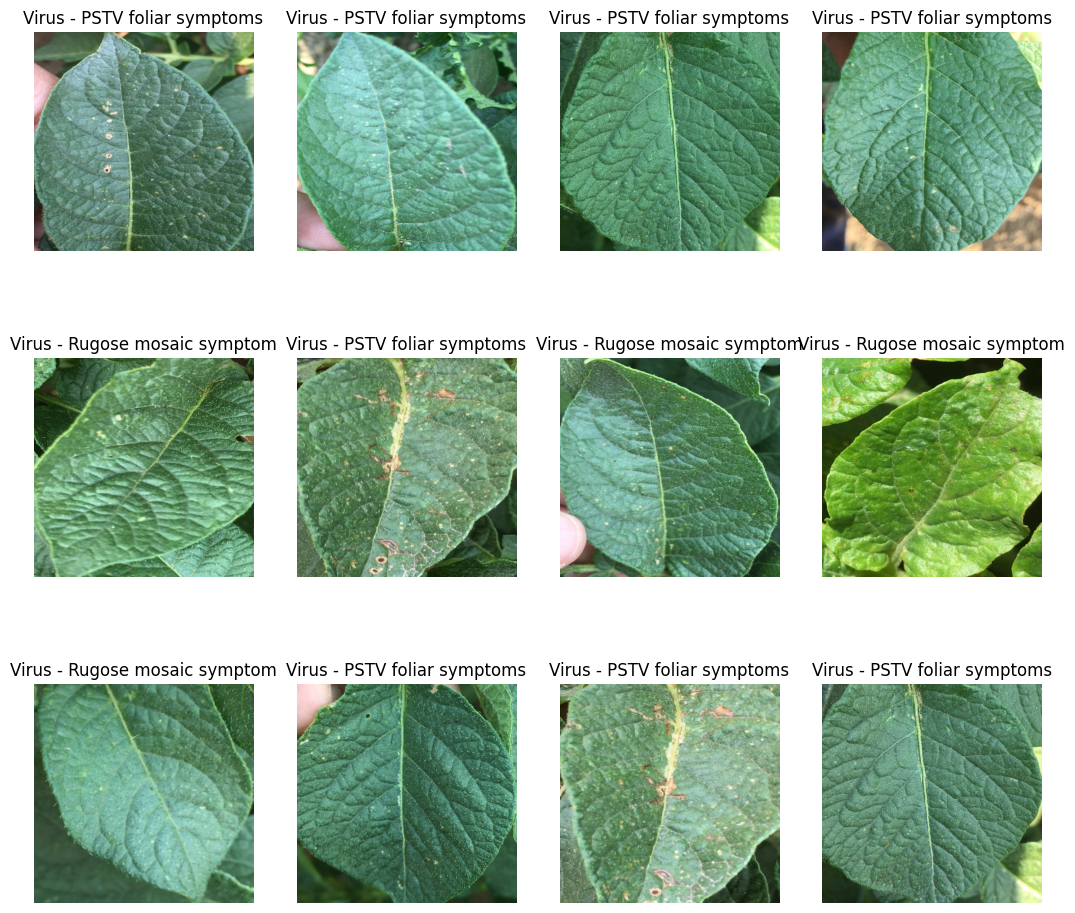

In [12]:
plt.figure(figsize=(13, 12))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
     

In [13]:
import cv2
import numpy as np
from skimage import exposure
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x = []
y = []

for cls in classes:
    pth = '/content/drive/MyDrive/Virus/Trainning/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '/' + j, 0)
        
        # Image Enhancement using histogram equalization
        img = exposure.equalize_hist(img)
        
        # Image Segmentation using k-means clustering
        img_flat = img.flatten().reshape(-1, 1)
        kmeans = KMeans(n_clusters=2, n_init=10).fit(img_flat)
        img_segmented = kmeans.labels_.reshape(img.shape)
        
        # Feature Extraction using PCA
        pca = PCA(n_components=1)
        img_pca = pca.fit_transform(img_flat)
        
        # Resizing the images
        img_resized = cv2.resize(img, (400, 400))
        
        # Flattening the images into a feature vector
        img_feature = img_resized.flatten()
        
        x.append(img_feature)
        y.append(classes[cls])

# Convert x and y to numpy arrays
x = np.array(x)
y = np.array(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = knn.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7850467289719626


In [14]:
import cv2
import numpy as np
from skimage import exposure
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

x = []
y = []

for cls in classes:
    pth = '/content/drive/MyDrive/Virus/Trainning/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '/' + j, 0)
        
        # Image Enhancement using histogram equalization
        img = exposure.equalize_hist(img)
        
        # Image Segmentation using k-means clustering
        img_flat = img.flatten().reshape(-1, 1)
        kmeans = KMeans(n_clusters=2, n_init=10).fit(img_flat)
        img_segmented = kmeans.labels_.reshape(img.shape)
        
        # Resizing the images
        img_resized = cv2.resize(img, (400, 400))
        
        # Flattening the images into a feature vector
        img_feature = img_resized.flatten()
        
        x.append(img_feature)
        y.append(classes[cls])

# Convert x and y to numpy arrays
x = np.array(x)
y = np.array(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = knn.predict(x_test)

# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 score: {f1}")


F1 score: 0.779041776713944
